In [6]:
from pathlib import Path
import shutil

from fastai.vision.all import *

from training import get_document_tiles, GetLabelFromX, SyntheticImageBlock

In [2]:
from fastai.torch_core import TensorCategory

In [8]:
data_root = Path('../../../data')

tmp_root = Path('/tmp/hki_data2')
if not tmp_root.exists():
    print('Copying data to instance SSD')
    shutil.copytree(data_root, tmp_root)
signature_root = tmp_root / 'signatures'
document_root = tmp_root / 'documents'


Checking SVG files in /tmp/hki_data2/signatures


100%|██████████| 50/50 [02:25<00:00,  2.91s/it]


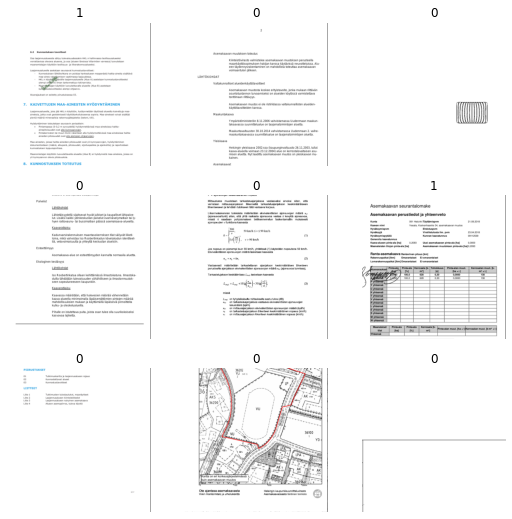

In [9]:
db = DataBlock(blocks=[SyntheticImageBlock(svg_directory=signature_root, positive_prob=0.3), CategoryBlock(vocab=[0,1])],
               get_items=get_document_tiles,
               get_x=ItemGetter(0),
               get_y=ItemGetter(1),
               item_tfms=[GetLabelFromX()])

dls = db.dataloaders(document_root, bs=80)

dls.show_batch()

In [10]:
learner = cnn_learner(dls, resnet18, metrics=[error_rate, Recall(), Precision(), F1Score()])
learner.lr_find()

In [ ]:
cbs = [ShowGraphCallback(), SaveModelCallback(fname='resnet18_based_model')]
learner.fine_tune(30, freeze_epochs=3, base_lr=2e-2, cbs=cbs)